In [30]:
from langgraph.graph import StateGraph , START , END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict
from pprint import pprint

In [20]:
load_dotenv()

True

In [21]:
llm= ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [29]:
class Topics(TypedDict):
    topic : str
    outline : str
    blog : str
    points: int

In [23]:
def outline_generator(state: Topics) -> Topics:
    on_topic = state['topic']
    prompt = f'Generate a small outline for a blog post on the topic: {on_topic}'
    result= llm.invoke(prompt)
    state['outline'] = result.content
    return state

In [24]:
def blog_generator(state: Topics) -> Topics:
    outline = state['outline']
    topic = state['topic']
    prompt = f'Write a 200 words blog post on the topic: {topic} using the following outline: {outline}'
    result= llm.invoke(prompt)
    state['blog'] = result.content
    return state

In [31]:
def points_obtained(state: Topics) -> Topics:
    blogs= state['blog']

    prompt= f'Evalute the points of blog - {blogs} only in interger from 0-10 , no extra stuff'
    points= llm.invoke(prompt).content

    state['points']= points
    return state

In [32]:
graph = StateGraph(Topics)

graph.add_node('outlines', outline_generator)
graph.add_node('blog' , blog_generator)
graph.add_node('evaluate' , points_obtained)


graph.add_edge(START , 'outlines')
graph.add_edge('outlines', 'blog')
graph.add_edge('blog', 'evaluate')
graph.add_edge('evaluate', END)

compiled_workflow= graph.compile()

initial_stage= {'topic' : 'Haryana from Rigveda to Modern Age'}
final_stage= compiled_workflow.invoke(initial_stage)

In [33]:
pprint(final_stage)

{'blog': '## Haryana: A Land of Ancient Roots and Enduring Spirit\n'
         '\n'
         'Often overlooked, Haryana boasts a rich and continuous history, a '
         'narrative woven from the threads of ancient civilizations to the '
         'pulse of modern India. This post embarks on a journey through time, '
         'tracing Haryana’s evolution from its Vedic origins to its dynamic '
         'present.\n'
         '\n'
         'In the Rigveda, Haryana was a significant part of the "Sapta '
         'Sindhu," the land of seven rivers, with the mighty Saraswati flowing '
         'through its heart. This fertile region was a cradle of early '
         'settlements, where Vedic rituals, societal structures, and profound '
         'philosophical ideas took root.\n'
         '\n'
         'As empires rose and fell, Haryana remained a strategic hub. From the '
         'Mauryan and Gupta eras to the Delhi Sultanate and Mughal rule, its '
         'proximity to Delhi made it crucia

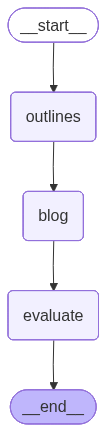

In [34]:
from IPython.display import Image
Image(compiled_workflow.get_graph().draw_mermaid_png())

In [39]:
'Points Obtained:',final_stage['points']

('Points Obtained:', '8')